In [1]:
"""
    Práctica 1  - Laboratorio 01

    Asignatura:   Data mining

    Autores: 
            - Beatriz Magán Pinto
            - Andrés Felipe Sánchez Patarroyo
            - David Alonso Rodríguez Lepina
            - Raúl Jiménez Juárez

    Fecha:      26/09/2019
"""

'\n    Práctica 1  - Laboratorio 01\n\n    Asignatura:   Data mining\n\n    Autores: \n            - Beatriz Magán Pinto\n            - Andrés Felipe Sánchez Patarroyo\n            - David Alonso Rodríguez Lepina\n            - Raúl Jiménez Juárez\n\n    Fecha:      26/09/2019\n'

# Importamos las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Obtención de datos

Para obtener los datos, importaremos el csv y lo guardaremos en un dataframe.


In [3]:
#Lectura y creación del dataframe
df_airbnb = pd.read_csv("DatasetsLab1/airbnb.csv")
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Limpieza y procesamiento de datos

Con el objetivo de encontrar datos anómalos o redundantes, vamos a aplicar las técnicas de preprocesamiento y limpieza de datos contenidas en los apuntes de la asignatura.

Para encontrar datos redudantes, si los hubiera, vamos a obtener las frecuencias de atributos unívocos. 

In [4]:
#Ordenamos el dataset por host_id
df_airbnb_ordenado = df_airbnb.sort_values(by="id")

Se comprobará el número de propietarios que hay y si alguno de ellos tiene varias propiedades en alquiler, es necesario tener en cuenta esta información para hacer comprobaciones de datos duplicados o inconsistentes.

In [5]:
#Contamos todos los host_id repetidos y sin repetir
numero_alquileres = df_airbnb_ordenado["host_id"].count()

#Contamos los host_id sin contar los repetidos
numero_propietarios = len(df_airbnb_ordenado["host_id"].unique())

print("Numero de propietarios: ", numero_propietarios)
print("Numero de alquileres: ", numero_alquileres)

Numero de propietarios:  37457
Numero de alquileres:  48895


Los resultados indican que los propietarios pueden tener varios alquileres, ya que el número de caseros es menor que el número de alquileres.

También se comprobará si hay alquileres con la misma ubicación, es decir, con la misma latitud y longitud. Esto es necesario para saber si existen edificios que contengan varios alquileres, ya sean apartamentos enteros o habitaciones individuales.

In [6]:
#Agrupamos por latitud y longitud
print("Agrupaciones por latitud/longitud: ", len(df_airbnb_ordenado.groupby(['latitude', 'longitude']).size()))

#Agrupamos por latitud, longitud y propietario
print("Agrupaciones por latitud/longitud/propietario: ", len(df_airbnb_ordenado.groupby(['latitude', 'longitude', 'host_id'])))

Agrupaciones por latitud/longitud:  48871
Agrupaciones por latitud/longitud/propietario:  48893


Tras esta comprobación, podemos decir que existe un edificio que contiene dos alquileres de un mismo propietario, ya que el número de agrupaciones realizadas en función de latitud, longitud y propietario es igual a 48893 y el número total de alquileres es 48895.

Asimismo, también hay que decir que existen 23 alquileres que se encuentran en el mismo edificio. El calculo se ha hecho de la misma forma, pero la agrupación ha cambiado, en este caso se ha agrupado únicamente la latitud y longitud.

Comprobaremos la existencia de datos duplicados, y confirmamos que no hay ningún registro duplicado.

In [7]:
print("Registros no duplicados: ", len(df_airbnb_ordenado.duplicated(subset = None, keep ='last')))

Registros no duplicados:  48895


### Datos incompletos

Lo siguiente que haremos será estudiar todos los valores incompletos/vacíos y tratarlos. Para ello buscaremos todos los valores 'null' y/o 'NaN' y, si es posible, los sustituiremos o eliminaremos, según más convenga al sistema.

In [8]:
columnas_null=df_airbnb_ordenado.columns[df_airbnb_ordenado.isnull().any()]

#Número de valores null por cada atributo
print(df_airbnb_ordenado[columnas_null].isnull().sum())

#print(df_airbnb_ordenado[df_airbnb_ordenado.isnull().any(axis=1)][columnas_null].head())
#Observamos que 16 son nombres son null, 21 de nombres de propietario y 10052 para ultima reseña y reseña por mes. 
#Concluimos diciendo que aunque estén vacíos no influyen negativament en el estudio de nuestra práctica. 

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


Comprobamos que existen diferentes valores 'null' y NaN en nuestro dataframe. Asimismo, dada la magnitud de nuestro dataset, suponemos que 16 y 21 valores nulos para el name y host_name respectivamente no influyen demasiado en nuestro sistema. 

En el caso de las reseñas, podemos ver que hay 10052 registros sin ninguna reseña. Que no exista ningún valor para el atributo last_review, quiere decir que no se ha hecho ninguna reseña hasta el momento, por lo que supondremos que el número de reseñas por mes será cero:

In [9]:
df_ordenado_limpio = df_airbnb_ordenado.fillna({'reviews_per_month':0})

### Reducción de dimensionalidad

Además, eliminaremos las columnas de 'name', 'host_id' y 'host_name' por ser irrelevantes para nuestro sistema y no unívocos. También ordenaremos el dataframe por barrio y reiniciaremos el orden de índices.

In [10]:
#Borrado de atributos
df_ordenado_limpio = df_airbnb_ordenado.drop(['name', 'host_id', 'host_name'], axis = 1)

#Ordenado
df_ordenado_limpio = df_ordenado_limpio.sort_values( by="neighbourhood_group")

#Reseteo del índex
df_ordenado_limpio = df_ordenado_limpio.reset_index()

### Dato anómalos

Para comprobar y eliminar los datos anómalos o erróneos, estableceremos la regla de que si hay más reseñas por mes que días del mes (31), eliminaremos dichos registros. Esto tiene lógica, ya que es imposible que un alquiler tenga más de 31 reseñas por mes dado que como mínimo, la estancia en el apartamento o habitación es de 1 noche.

In [11]:
#Guardamos los valores anómalos por seguridad
dato_anomalo = df_ordenado_limpio[df_ordenado_limpio['reviews_per_month'] > 31]

#Guardamos los valores no anómalos 
df_ordenado_limpio = df_ordenado_limpio[df_ordenado_limpio['reviews_per_month'] < 31]

# Transformación de Datos

### Intervalos de reseña

Para obtener los intervalos de reseña y clasificarlas en 'Baja', 'Media' y 'Alta', se llevará a cabo la discretización, usando el método de intervalos con misma frecuencia. De esta forma, tendremos que hallar los diferentes terciles y según nuestro número de intervalos (3) realizar los calculos.

Todo esto es necesario para posteriormente, medir el grado de reseñas por mes.

In [12]:
total_porcentaje = 1
numero_intervalos = 3

primer_tercil = total_porcentaje / numero_intervalos
segundo_tercil = 2*(total_porcentaje / numero_intervalos)

#Calculo de terciles
valor_primer_tercil = df_ordenado_limpio['reviews_per_month'].quantile(primer_tercil)
valor_segundo_tercil = df_ordenado_limpio['reviews_per_month'].quantile(segundo_tercil)

#Valor máximo de reseñas
valor_maximo_reseña = df_ordenado_limpio['reviews_per_month'].max()

print("Intervalos de reseña son: [{}, {}), [{}, {}), [{}, {}] ".format(0, valor_primer_tercil, 
                                                                                         valor_primer_tercil, valor_segundo_tercil, 
                                                                                         valor_segundo_tercil, valor_maximo_reseña))

Intervalos de reseña son: [0, 0.3), [0.3, 1.46), [1.46, 27.95] 


### Intervalos de Disponibilidad

Para obtener los intervalos de disponibilidad y clasificarla en 'Poco disponible', 'Disponible normalmente' y 'Altamente disponible', se llevará a cabo la discretización, usando el método de intervalos con la misma amplitud. De esta forma, sólo tendremos que dividir el total de días entre nuestro intervalo (3).

In [13]:
#Asignamos valores maximos, minimos e intervalos
valor_maxdisp = df_ordenado_limpio['availability_365'].max()
valor_mindisp = df_ordenado_limpio['availability_365'].min()
intervalos = 3

#Calculo
distancia_intervalodisp = (valor_maxdisp-valor_mindisp)/intervalos

print("Intervalos de disponibilidad: ({},{}), ({}, {}), ({}, {}) ".format(round(float(valor_mindisp), 3), valor_mindisp+distancia_intervalodisp, 
                                                                          valor_mindisp+ distancia_intervalodisp-1, distancia_intervalodisp-1+distancia_intervalodisp, 
                                                                           distancia_intervalodisp-1+distancia_intervalodisp, valor_maxdisp))

Intervalos de disponibilidad: (0.0,121.66666666666667), (120.66666666666667, 242.33333333333334), (242.33333333333334, 365) 


### Creación de atributos

Creamos los nuevos atributos y asignamos los valores en función de los rangos calculados anteriormente, tanto para la disponibilidad y las reseñas por mes. 

Además, creamos el atributo 'calidad_apartamento' el cual, como su nombre indica, es la calidad que tiene el apartamento según las reglas predefinidas en la documentación.

In [14]:
#Variable relativa a reseñas por mes
df_ordenado_limpio['col_review_cat']= 'Media'
df_ordenado_limpio.loc[df_ordenado_limpio['reviews_per_month'] < valor_primer_tercil, 'col_review_cat'] ='Baja'
df_ordenado_limpio.loc[df_ordenado_limpio['reviews_per_month'] >= valor_segundo_tercil, 'col_review_cat'] ='Alta'

#Variable relativa a disponibilidad
df_ordenado_limpio['col_disponibilidad_cat']= 'Disponible normalmente'
df_ordenado_limpio.loc[df_ordenado_limpio['availability_365'] < distancia_intervalodisp, 'col_disponibilidad_cat'] ='Poco disponible'
df_ordenado_limpio.loc[df_ordenado_limpio['availability_365'] >= 2* distancia_intervalodisp, 'col_disponibilidad_cat'] ='Altamente disponible'

#Creación de calidad_apartamento y asignación de valores
df_ordenado_limpio['calidad_apartamento'] = 'Bueno'
df_ordenado_limpio.loc[(df_ordenado_limpio['col_review_cat'] == 'Alta') & (df_ordenado_limpio['col_disponibilidad_cat'] == 'Poco disponible'), 'calidad_apartamento'] = 'Muy bueno'
df_ordenado_limpio.loc[(df_ordenado_limpio['col_review_cat'] == 'Baja') & (df_ordenado_limpio['col_disponibilidad_cat'] == 'Disponible normalmente'), 'calidad_apartamento'] = 'Regular'
df_ordenado_limpio.loc[(df_ordenado_limpio['col_review_cat'] == 'Media') & (df_ordenado_limpio['col_disponibilidad_cat'] == 'Disponible normalmente'), 'calidad_apartamento'] = 'Regular'
df_ordenado_limpio.loc[(df_ordenado_limpio['col_review_cat'] == 'Alta') & (df_ordenado_limpio['col_disponibilidad_cat'] == 'Disponible normalmente'), 'calidad_apartamento'] = 'Bueno'
df_ordenado_limpio.loc[(df_ordenado_limpio['col_review_cat'] == 'Baja') & (df_ordenado_limpio['col_disponibilidad_cat'] == 'Altamente disponible'), 'calidad_apartamento'] = 'Malo'
df_ordenado_limpio.loc[(df_ordenado_limpio['col_review_cat'] == 'Media') & (df_ordenado_limpio['col_disponibilidad_cat'] == 'Altamente disponible'), 'calidad_apartamento'] = 'Malo'
df_ordenado_limpio.loc[(df_ordenado_limpio['col_review_cat'] == 'Alta') & (df_ordenado_limpio['col_disponibilidad_cat'] == 'Altamente disponible'), 'calidad_apartamento'] = 'Muy malo'

df_ordenado_limpio.head()

,index,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,col_review_cat,col_disponibilidad_cat,calidad_apartamento
0,7704,5824543,Bronx,Longwood,40.82209,-73.90086,Private room,80,1,2,2019-04-30,0.32,1,255,Media,Altamente disponible,Malo
2,32797,25833266,Bronx,Claremont Village,40.84346,-73.91151,Private room,35,1,49,2019-01-23,3.84,1,168,Alta,Disponible normalmente,Bueno
3,24924,19974905,Bronx,Parkchester,40.83805,-73.85867,Shared room,26,1,18,2019-04-23,0.78,2,342,Media,Altamente disponible,Malo
4,32784,25816034,Bronx,Van Nest,40.84778,-73.86146,Entire home/apt,150,1,29,2019-06-03,2.23,3,24,Alta,Poco disponible,Muy bueno
5,32781,25815620,Bronx,Van Nest,40.84787,-73.86177,Entire home/apt,107,1,47,2019-06-23,3.63,3,8,Alta,Poco disponible,Muy bueno


# Obtención de los 5 barrios más populares

Se buscarán los 5 barrios más populares en función de la media de disponibilidad que tengan todos los apartamentos que lo forman. Se ha empleado este criterio ya que un apartamento puede tener buena calidad pero no ser popular, por ello se tendrá en cuenta el número de veces que se reserva.

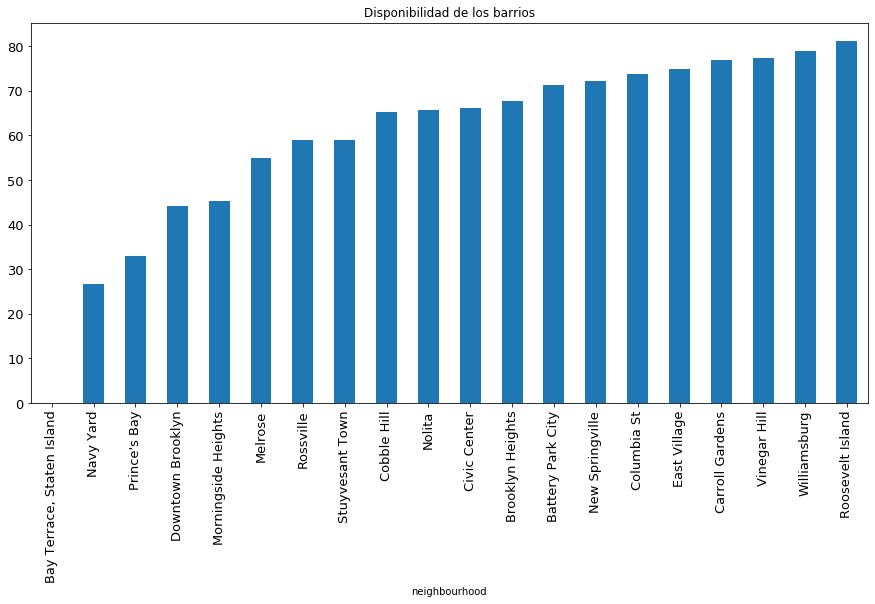

In [15]:
#Representamos un bar plot para ver las diferencias en disponibilidad de cada barrio
df_ordenado_limpio.groupby(['neighbourhood']).mean()['availability_365'].sort_values().head(20).plot.bar(figsize=(15,7), title='Disponibilidad de los barrios', fontsize=13, rot = 90)

Como se puede observar en la gráfica de barras de arriba ("Disponibilidad de los barrios"), los 5 barrios con menor disponibilidad y por lo tanto, con mayor afluencia de clientes, son:

    - Bay Terrace, Staten Island
    - Navy Yard
    - Prince's Bay
    - Downtown Brooklyn
    - Morningside Heights
    
Asimismo, se han representado los 20 barrios más populares, y se puede observar que Williamsburg ocupa la posición 19º. No está entre los 5 más populares pero si contamos que hay más de 200 barrios, estar en el TOP20 no está nada mal. Por ello y porque estamos estudianto ese barrio en concreto, lo incluiremos en el diagrama de burbujas que se representará en los siguientes pasos.

### Diagrama de Burbujas

Tras obtener los barrios más populares y ver la buena posición que ocupa Williamsburg, se procederá a la creación del diagrama de burbujas para tener una visión más detalla de estos 6 barrios analizados. Hay que mencionar, que en el diagrama de burbujas que se creará, los tamaños de las burbujas indicarán la cantidad de alquileres y, por lo tanto, se tendrá un diagrama de burbujas de 3 componentes.

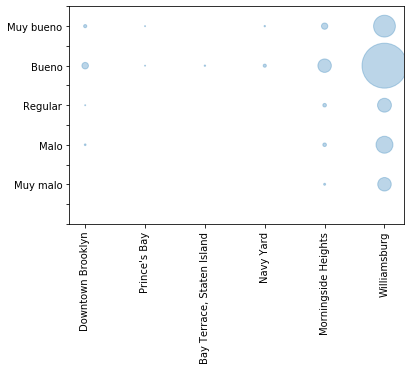

In [16]:
#Crearemos un nuevo dataframe con todos los apartamentos pertenecientes a esos barrios
#Copia del dataframe
df_barrios_populares = df_ordenado_limpio.copy()

#Nos quedamos sólo con los barrios populares
df_barrios_populares = df_barrios_populares[(df_barrios_populares.neighbourhood == 'Bay Terrace, Staten Island') | 
                    (df_barrios_populares.neighbourhood == 'Navy Yard') |
                    (df_barrios_populares.neighbourhood == "Prince's Bay") | 
                    (df_barrios_populares.neighbourhood == 'Downtown Brooklyn') |
                    (df_barrios_populares.neighbourhood == 'Morningside Heights') | 
                    (df_barrios_populares.neighbourhood == 'Williamsburg')]

#Agregamos una columna que almacene la posición del barrio
df_barrios_populares['n_pos'] = 0
df_barrios_populares.loc[df_barrios_populares.neighbourhood == 'Bay Terrace, Staten Island','n_pos'] = 1
df_barrios_populares.loc[df_barrios_populares.neighbourhood == 'Navy Yard','n_pos'] = 2
df_barrios_populares.loc[df_barrios_populares.neighbourhood == "Prince's Bay",'n_pos'] = 3
df_barrios_populares.loc[df_barrios_populares.neighbourhood == 'Downtown Brooklyn','n_pos'] = 4
df_barrios_populares.loc[df_barrios_populares.neighbourhood == 'Morningside Heights','n_pos'] = 5
df_barrios_populares.loc[df_barrios_populares.neighbourhood == 'Williamsburg','n_pos'] = 19

#Agrupamos lo apartamento por barrio y calidad, contando cuantos apartamentos se encuentran en dichos grupos
df_barrios_populares_burbuja = df_barrios_populares.copy()
df_barrios_populares_burbuja=df_barrios_populares_burbuja.groupby(['neighbourhood','calidad_apartamento']).count()
df_barrios_populares_burbuja.drop(df_barrios_populares_burbuja.columns.difference(['availability_365','n_pos']),1,inplace=True)
df_barrios_populares_burbuja['apt_count']=df_barrios_populares.groupby(['neighbourhood','calidad_apartamento']).count()['availability_365']
df_barrios_populares_burbuja.reset_index(level=[0,1],inplace=True)

#Daremos valores numéricos a las categorías de calidad, esto con el fin de organizar el eje y de “muy malo” a “muy bueno”
df_barrios_populares_burbuja['calidad_num'] = 4
df_barrios_populares_burbuja.loc[df_barrios_populares_burbuja['calidad_apartamento'] == 'Muy bueno','calidad_num'] = 5 
df_barrios_populares_burbuja.loc[df_barrios_populares_burbuja['calidad_apartamento'] == 'Regular','calidad_num'] = 3
df_barrios_populares_burbuja.loc[df_barrios_populares_burbuja['calidad_apartamento'] == 'Malo','calidad_num'] = 2
df_barrios_populares_burbuja.loc[df_barrios_populares_burbuja['calidad_apartamento'] == 'Muy malo','calidad_num'] = 1

#Ordenamos por la posición de los barrios
df_barrios_populares_burbuja.sort_values(by=['n_pos','calidad_num'],inplace=True)

#area= apartamentos en el grupo
fig, ax = plt.subplots()
size=df_barrios_populares_burbuja['apt_count'].tolist()
fig=plt.scatter(df_barrios_populares_burbuja.neighbourhood.tolist(),df_barrios_populares_burbuja.calidad_num.tolist(),s=size,alpha=0.3)
fig=plt.xticks(rotation=90)

#renombramos las etiquetas del eje y, para pasar de los valores numéricos de nuevo a los categóricos
labels = ['','','Muy malo','','Malo','','Regular','','Bueno','','Muy bueno']
plt.yticks(np.arange(0, 6, step=0.5))
ax.set_yticklabels(labels)
plt.show()

En el diagrama de burbujas ("Distribución Barrios Populares"), se puede observar algo muy interesante si lo contrastamos con el diagrama de barras anterior. 

Lo primero que podemos observar es que, lo más habitual en estos barrios es encontrarse con apartamentos buenos y muy buenos. Por ello podríamos deducir que la popularidad de los barrios depende mucho de la calidad de los mismos y que, cuanta más calidad tengan más populares se volverán y más gente irá. Esto parece algo trivial pero desde luego no lo es.

Y es que, los tres primeros barrios (Bay Terrace, Navy Yand, Prince's Bay), sólo apartamentos de Muy buena y buena calidad, pero algo que también llama la atención es su escaso número de apartamentos. Podríamos deducir que los pocos apartamentos que hay en el barrio son bastante buenos y, por lo tanto, ocupan una muy buena posición en el ranking de barrios populares.

Por otra parte, fijándonos en Williamsburg, podemos observar que tiene apartamentos de todo tipo, con mayor número de buenos alquileres pero gran cantidad también en el resto de calidades. Aún es pronto para mostrar las conclusiones finales, pero esto podría deberse a que es un barrio en alza y que está popularizándose, por lo que no todos sus apartamentos son especialmente populares, pero si que es cierto que los buenos apartamentos están en alza. Asimismo, se puede observar que es el barrio con mayor número de alquileres en su conjunto, siendo mayoría los alquileres 'Bueno' y 'Muy Bueno'.

# Diferencias de precio

A continuación, se estudiará la diferecia de precio del alquiler de una habitación o un apartamento entre los diferentes barrios populares.

Para ello, nos apoyaremos en el uso de los diagramas de cajas.

In [17]:
#Creacion del nuevo dataframe
df_barrios_populares_precio = df_barrios_populares.copy()

#Eliminamos todas las columnas irrelevantes
df_barrios_populares_precio.drop(df_barrios_populares_precio.columns.difference(['neighbourhood','room_type','price']), 1, inplace=True)
df_barrios_populares_precio.head()

,neighbourhood,room_type,price
1119,Williamsburg,Entire home/apt,180
1131,Williamsburg,Private room,55
1145,Williamsburg,Entire home/apt,175
1146,Williamsburg,Entire home/apt,800
1147,Williamsburg,Private room,66


Con el nuevo dataframe, dividiremos en dos nuestro problema: por una parte mostraremos los diagramas de caja de los precios de las habitaciones por cada barrio, y por otra parte, haremos lo mismo para los apartamentos. De esta forma, se podrá tener una vision amplia de las diferencias de precios entre los diferentes barrios.

### Habitaciones individuales

Procedemos con la creación del diagrama de cajas para las habitaciones individuales en los diferetes barrios populares.

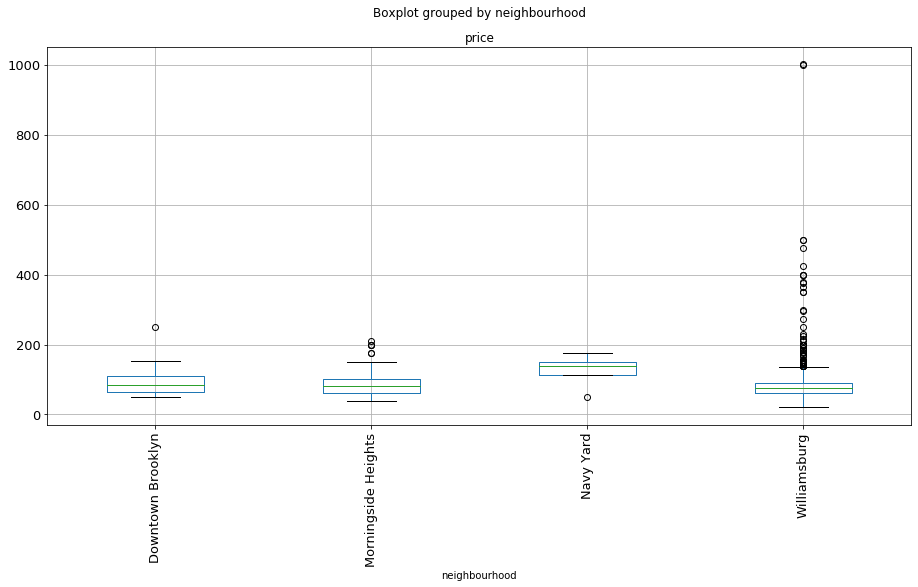

In [18]:
df_barrios_populares_precio[
    (df_barrios_populares_precio.room_type=='Private room')].boxplot(by='neighbourhood',column='price', rot=90, fontsize=13, figsize=(15,7))

### Apartamentos

Procedemos con la creación del diagrama de cajas para los apartamentos en los diferentes barrios populares.

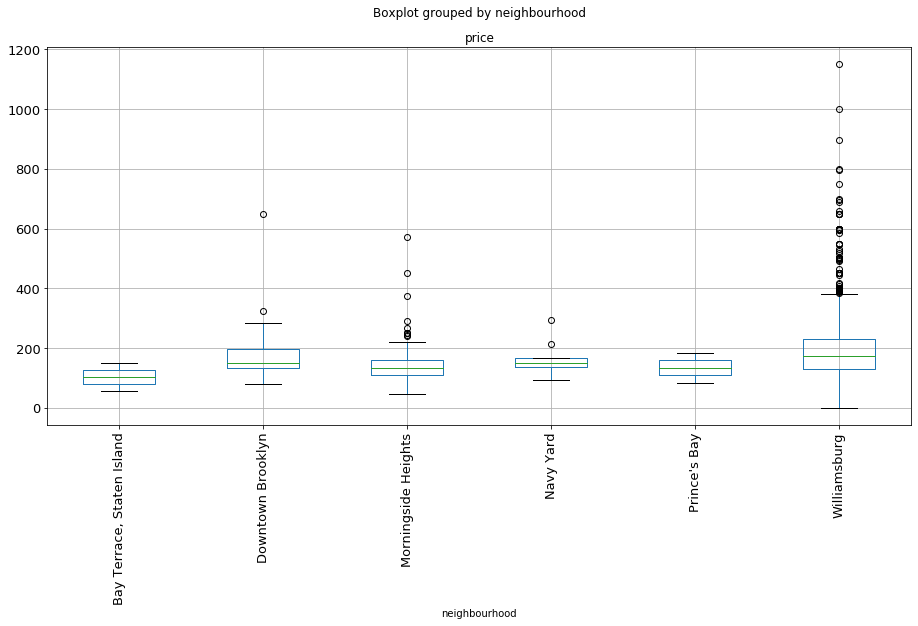

In [19]:
df_barrios_populares_precio[
    (df_barrios_populares_precio.room_type=='Entire home/apt')].boxplot(by='neighbourhood',column='price', rot=90, fontsize=13, figsize=(15,7))

Una vez reprensetandos los diagramas, podemos observar diferentes cosas. 

Lo primero de todo, y algo que llama la atención es la inexistencia de habitaciones individuales en los barrios de Bay Terrace y Prince's Bay. Sabiendo que son dos bahías costeras, podemos llegar a la conclusión de que tiene sentido que tan sólo se alquilen apartamentos de buena calidad, ya que estarían bien enfocadas hacia el turismo vacacional o la gente que trabaje en el muelle/puerto.

Otra cosa que llama la atención enormemente es la gran cantidad de valores atípicos, indicando la gran cantidad de alquileres que están mucho más caros de lo normal. Se dan sobre todo en dos barrios: Morningside Heights y Williansburg. 

En el primer barrio, Morningside Heights, uno de los motivos que podrían influir en la subida, podría ser que un campues de la Universidad de Columbia se encuentra en ese barrio por lo que, los caseros podrían aprovecharlo.

El segundo barrio, Williansburg, los datos atípicos son muchos por lo que se podría pensar que ya no son tan atípicos como se pensaba. Con esto podemos deducir que muchos caseros se han dado cuenta de que el barrio está popularizándose rápidamente y por ello, están subiendo los precios enormemente, tanto de las habitaciones como de los apartamentos. De hecho, observando el diagrama, podemos observar como los precios considerados 'normales' de los apartamentos son un poco más elevados que en el resto de barrios, aunque esto no pasa con las habitaciones.

Otro cosa que destacar en el barrio, es un valor atípico en el diagrama de habitaciones, donde parece ser que una habitación llega a los 1000 dolares.

# Tendencia a dejar reseñas

A continuación, veremos como ha evolucionado la tendencia a dejar reseñas en la app durante los últimos años. Para ello, como siempre, modificaremos el dataframe para poder modelarlo correctamente.

In [20]:
#Creacion del nuevo dataframe
df_comentarios = df_ordenado_limpio.copy()

#Eliminamos todas las columnas irrelevantes
df_comentarios.drop(df_comentarios.columns.difference(['last_review']), 1, inplace=True)
df_comentarios.sort_values(by='last_review').head()

,last_review
19781,2011-03-28
21136,2011-04-25
19804,2011-05-12
20963,2011-09-18
43211,2011-09-19


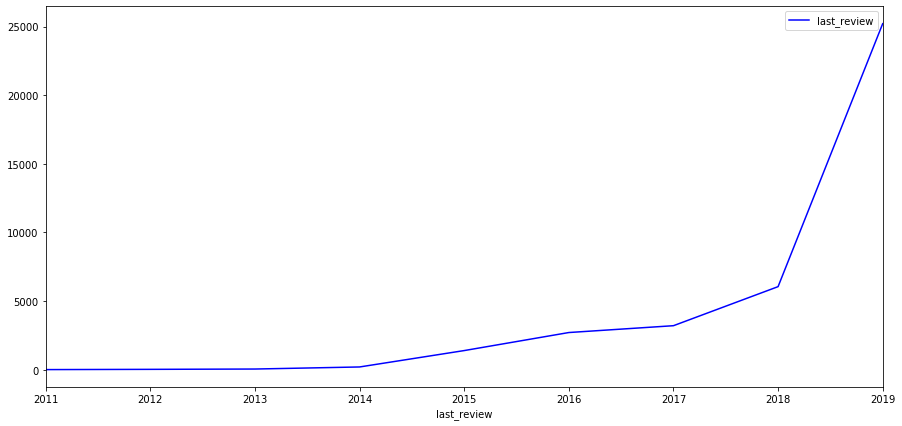

In [21]:
#Convertimos el atributo 'last_review' en un datetime para poder usarlo más facilmente.
df_comentarios['last_review'] = pd.to_datetime(df_comentarios['last_review'], format='%Y-%m-%d')

#Representamos graficamente agrupando por año
df_comentarios.groupby(df_comentarios.last_review.dt.year).count().plot(grid=False, color='blue', figsize=(15,7))

Como se puede observar y confirmando la hipótesis, la tendencia a dejar reseñas ha aumentando enormemente desde hace un par de años. Asimismo, se ve un claro repunte y aumento exponencial a partir del año 2018.

Además, cabe destacar que el aumento inicial comenzó en el año 2014, aproximadamente cuando se empezó a generalizar el uso del smartphone.

### Curiosidad

A modo de simple curiosidad, vamos a ver en que meses se han dado mayor número de reseñas, para comprobar si la época del año influye y si es así, cuánto.

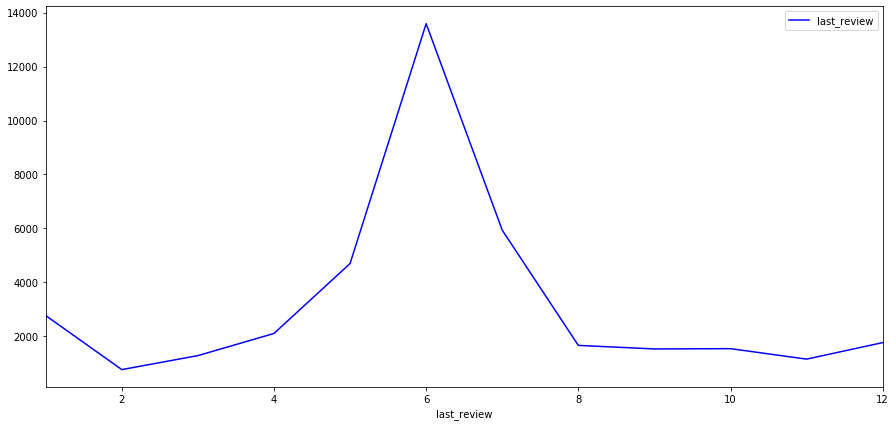

In [22]:
#Representamos graficamente agrupando por mes
df_comentarios.groupby(df_comentarios.last_review.dt.month).count().plot(grid=False, color='blue', figsize=(15,7))

El resultado es bastante interesante, ya que muestra que en los meses de verano las reseñas suelen aumentar bastante más con respecto al resto del año, llegando a multiplicar el número de reservas. Seguramente debido a que en esas épocas el número de turistas y reservas aumenta considerablemente. El segundo pico proviene de enero, a justo después de las Navidades.